Это csv-файл, пожатый gzipом. Там четыре колонки:

    client_id – идентификатор пользователя
    hour – отсечка времени, час
    requests – Общее количество запросов от этого пользователя за этот час
    requests_blocked – Число заблокированных запросов пользователя за этот час.

Следует иметь в виду, что время фиксируется на сервере, а клиенты могут быть в разных часовых поясах (от Владивостока до Калининграда)

Вопрос, на который нужно найти ответ: какие из пользователей являются физическими лицами, а какие – юридическими. Обратите внимание, что эту задачу нельзя решить правильно в строгом смысле этого слова: любое решение, даже случайное угадывание, с формальной точки зрения, будет являться решением. Вам предстоит свое решение обосновать. Ответьте, пожалуйста, на вопрос: “Почему можно утверждать, что задача решена?”.

У нас есть принятое за эталон решение этой задачи, которое нам кажется достаточно убедительным. Хотелось бы увидеть что-то подобное и у Вас.

"client_id","hour","requests","requests_blocked"
"15091","2014-04-01 00:00:00","289","0"
"9765","2014-04-01 00:00:00","70460","0"
"13125","2014-04-01 00:00:00","2555","6"
"5576","2014-04-01 00:00:00","92","12"
...
"2828","2014-07-21 23:00:00","7","0"
"8639","2014-07-21 23:00:00","42","15"
"5206","2014-07-21 23:00:00","4","3"
"10038","2014-07-21 23:00:00","2","0"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('skydns_testproblem')
x = data[['client_id', 'requests', 'requests_blocked']].set_index(['client_id'])

In [2]:
a = x.groupby(level=0, sort=False)['requests', 'requests_blocked'].sum().sort_values(['requests'])

req = a[['requests']]
badreq= a[['requests_blocked']]

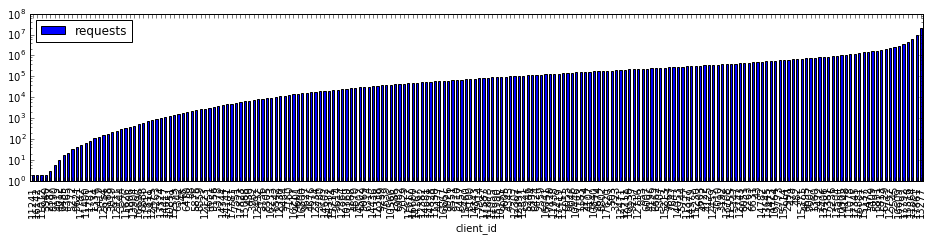

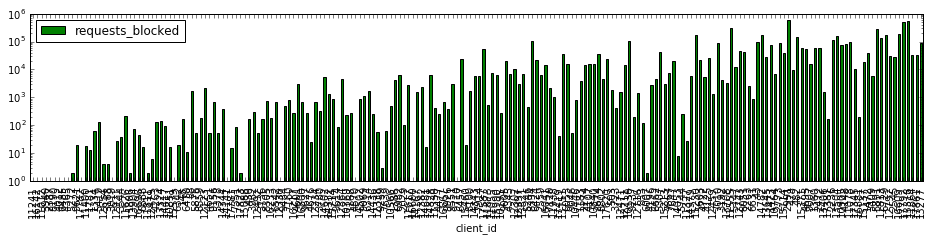

In [3]:
fig_req = req[::len(a)/200].plot(kind='bar', figsize=(16,3), log=True)
plt.show()

fig_badreq = badreq[::len(a)/200].plot(kind='bar', figsize=(16,3), log=True, color='g')
plt.show()

In [3]:
hours = [str(i) for i in pd.date_range('00:00', '23:00', freq="1h").time]
clients = a.index.values
bs = pd.DataFrame(0, index=clients, columns=hours)

In [17]:
import time

# нижеследующий цикл на моей троттлящей сковородке считался 44 минуты
# использовать файл ниже
t = time.time()
for i, row in data.iterrows():
    if not i%100000:
        print(i)
        print("spent time: ", time.time()-t)
    curr_hour = row['hour'].split(' ')[1]
    curr = b.get_value(row['client_id'], curr_hour)
    bs.set_value(row['client_id'], curr_hour, row['requests']+curr)
bs.to_csv('b')

MemoryError: 

In [4]:
b = pd.read_csv('b')

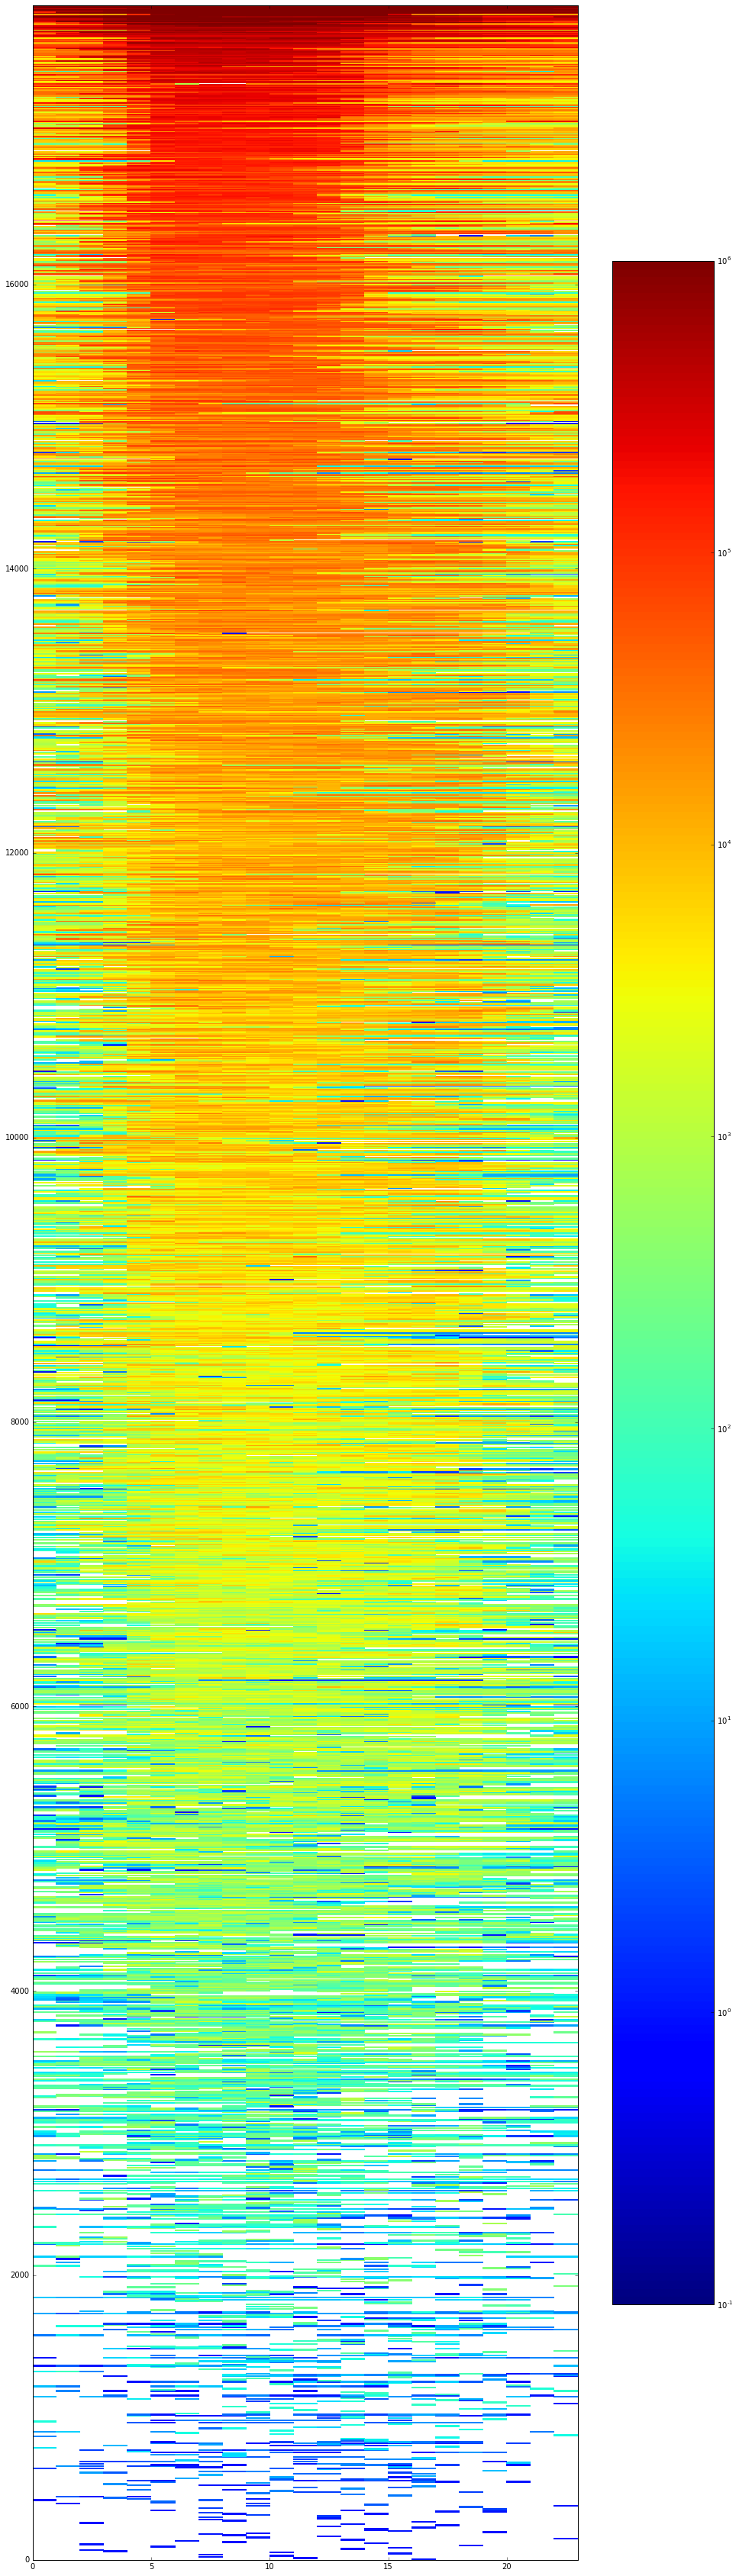

In [8]:
import matplotlib.colors as colors

fig = plt.figure(figsize=(16, 60))
xs = [i for i in range(0, 24)]
ys = list(sorted(clients))[::len(clients)/2000] # hardcoded
zs = b[::len(clients)/2000]
plt.pcolor(xs, ys, zs, norm=colors.LogNorm(vmin=0.1, vmax=1000000)) # hardcoded as well
plt.colorbar()
plt.axis([0, 23, 0, len(clients)])
plt.show()

In [5]:
from datetime import datetime
import time
format = '%Y-%m-%d %H:%M:%S'

c = pd.DataFrame(0, index=clients, columns=[i for s in [[i, j+'b'] for i, j in zip(hours, hours)] for i in s])

dataset_len = 13074259
t = time.time()
for i, row in data.iterrows():
    if not i%100000:
        print(i, "done: ", i*100/dataset_len)
        print("spent time: ", time.time()-t)
    if datetime.strptime(row['hour'], format).weekday() == 6: # Sunday
        # when requests:
        curr_hour = row['hour'].split(' ')[1]
        curr = c.get_value(row['client_id'], curr_hour)
        c.set_value(row['client_id'], curr_hour, row['requests']+curr)
        #when blocked requests:
        curr = c.get_value(row['client_id'], curr_hour+'b')
        c.set_value(row['client_id'], curr_hour+'b', row['requests_blocked']+curr)
print(c)

(0, 'done: ', 0)
('spent time: ', 1.7131378650665283)
(100000, 'done: ', 0)
('spent time: ', 14.782372951507568)
(200000, 'done: ', 1)
('spent time: ', 28.82432794570923)
(300000, 'done: ', 2)
('spent time: ', 42.87181997299194)
(400000, 'done: ', 3)
('spent time: ', 57.000529050827026)
(500000, 'done: ', 3)
('spent time: ', 72.22749495506287)
(600000, 'done: ', 4)
('spent time: ', 86.80822205543518)
(700000, 'done: ', 5)
('spent time: ', 115.22297286987305)
(800000, 'done: ', 6)
('spent time: ', 128.97535490989685)
(900000, 'done: ', 6)
('spent time: ', 142.0282039642334)
(1000000, 'done: ', 7)
('spent time: ', 155.1096329689026)
(1100000, 'done: ', 8)
('spent time: ', 168.32825589179993)
(1200000, 'done: ', 9)
('spent time: ', 181.3498170375824)
(1300000, 'done: ', 9)
('spent time: ', 194.42456603050232)
(1400000, 'done: ', 10)
('spent time: ', 207.5249490737915)
(1500000, 'done: ', 11)
('spent time: ', 227.81059098243713)
(1600000, 'done: ', 12)
('spent time: ', 248.88521003723145)


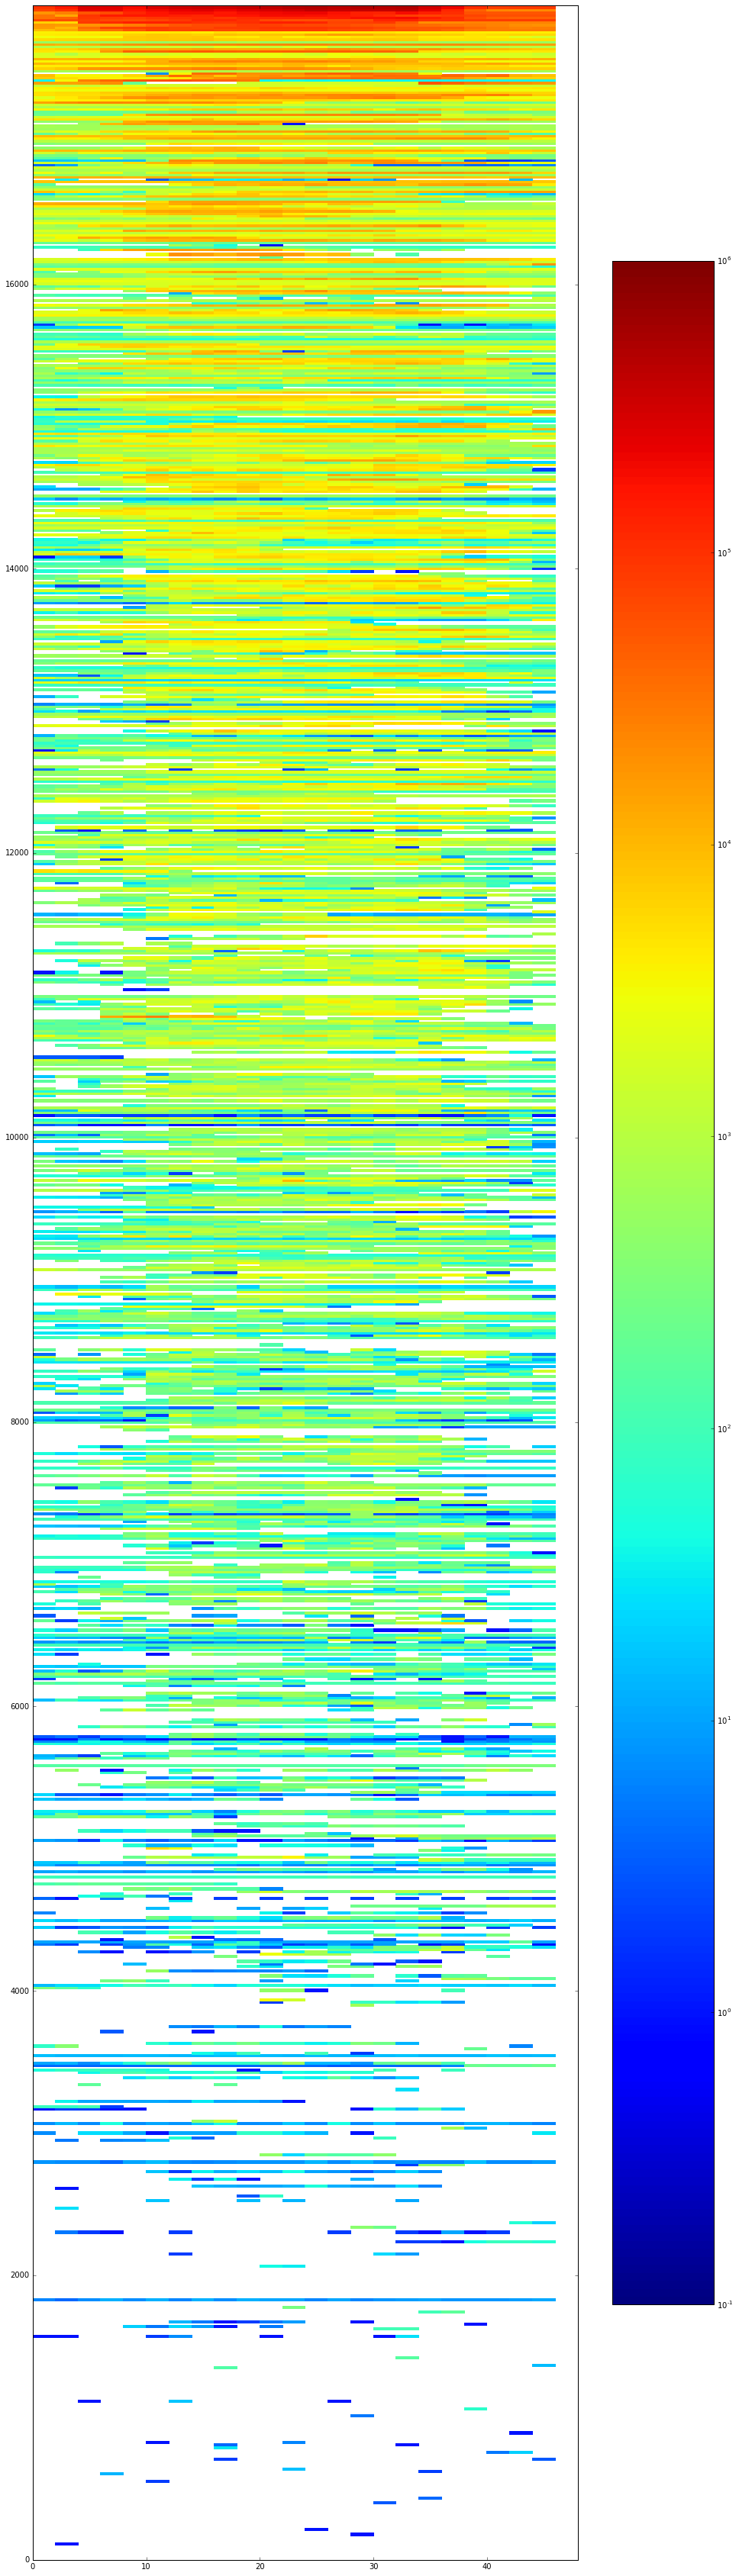

In [22]:
fig = plt.figure(figsize=(16, 60))
xs = [i for i in range(0, 48, 2)]
ys = list(sorted(clients))[::len(clients)/1000] # hardcoded
zs = c.loc[::len(clients)/1000, [i for i in hours]]
plt.pcolor(xs, ys, zs, norm=colors.LogNorm(vmin=0.1, vmax=1000000)) # hardcoded as well
plt.colorbar()
plt.axis([0, 48, 0, len(clients)])
plt.show()